# Введение в искусственные нейронные сети
# Урок 3. Keras

## Содержание методического пособия:


<ol>
<li>Способы создания нейросетей</li>
<li>Что такое Keras</li>
<li>Основы синтаксиса</li>
<li>Простая нейросеть на Keras</li>
</ol>

## Способы создания нейросетей

Нейросети это математические модели. Программирую на любом языке можно решать задачи связанные с математикой. Однако встает вопрос какой язык подойдет для этого больше? Не считая учебных нейросетей, нейросети как правило работают с большим количеством данных. Поэтому, чтобы обучение нейросетей происходило с приемлимой скоростью нужно использовать быстрый язык. Например Си. Но так как язык Си это язык с низким уровнем абстракции то программировать и модифицировать на нем нейросети было бы крайне затруднительно. 

Хорошо может подойти для этих целей язык Python. Так как он с одной стороны имеет высокий уровень абстракции с другой стороны операции с массивами данных могут сделать его библиотеки написанные на Си. Таким способом мы пользовались на первых 2 уроках. Однако если писать нейросети таким образом то будет много повторяющегося кода поскольку архитектуры нейросетей остаются одинаковыми и зачастую у них только меняются параметры. Кроме этого нам может понадобиться хорошо знать архитектуры самых разных нейронных сетей чтобы реализовать их вручную. Работа таким образом затруднительна для людей не имеющих достаточной подготовки, а для имеющих может быть нааборот рутиной.

Существуют фреймворки для созданий нейронных сетей. Они являются, пожалуй основным рабочим способом создания нейронных сетей. Вот их неполный перечень:

1. TensorFlow
2. PyTorch
3. Keras
4. Microsoft Cognitive Toolkit (CNTK)
5. Caffe
6. Apache MXNet

Упрощение создания нейронных сетей не заканчивается на этих фрейворках. Существуют инструменты которые позволяют создавать нейронные сети без навыков программирования, строя нейросети графически. Примеры: Neural Designer, Deep Learning Studio.

Но и на этом не заканчиваются способы создания нейросетей. Существуют инструменты самостоятельно создающие нейронные сети. Это так называемые AutoML инструменты. Вот примеры популярных из них:
1. MLBox
2. TPOT
3. Autokeras

Как вы возможно заметили что все эти инструменты отранжированы походы изложения в порядке возрастания уровня абстракции. Соответсвенно говоря о плюсах минусах того или иного инструмента мы должны понимать в принципе плюсы минусы повышения уровня абстракции. Чем он выше тем меньше производительность и тем меньше его гибкость и набоорот.

Как уже было сказано наиболее востребованных в рабочих целях является тот уровень абстракции, который дают фреймворки. Будем изучать дальше и пользовать ими. Остается сделать выбор среди них. Самый популярный фреймворк для создания нейросетей TensorFlow. Самый популярный для обучения - Keras. На этом уроке мы изучим с вами Keras, а на следующим TensorFlow. Также стоит отметить, что эти фреймворки взаимосвязаны - Keras как правило работает поверх TensorFlow, а сам TensorFlow позволяет пользовать средствами Keras при необходимости.


## Что такое Keras

Keras появился относительно недавно - в 2015 г. Но за это время стал одним из самых популярных фреймоворков для создания нейросетей и фактически стандартом для использования его начинающими.

В чем причина его популярности? Keras позволяет создовать на высоком уровне абстракции. Т.е. на не нужно вручную реализовать с помощью математикаподобного кода те или иные элементы нейронной сети. Мы можем оперировать слоями, количеством нейронов в них, выбором функции активации и т.д. В тоже время keras содержит инструментарий для всего того, что может понадобиться для работы - например ряд встроенных датасетов, возможность обрабатывать изображения.

В техническом плане Keras это оболочка над инструментами меньшей степени абстракции. На выбор он может работать поверх TensorFlow, Microsoft Cognitive Toolkit, R, Theano, PlaidML.

Keras пользуется также на соревнованиях Kaggle.

Однако стоит отметить, что в реальных проектах чаще используется TensorFlow, который мы будем изучать в след. уроках.

Keras как и любой высокобастрактный инструмент имеет изъяны в качестве меньшей гибкостью и производительснотью чем тот же tensorflow.

Стоит также отметить, что Google официально поддерживает Keras, его автор François Chollet, является сотрудником Google. TensorFlow сам в свою очередь позволяет использовать возможности Keras, т.е. в нем заложена возможность переходить на более высокой уровень абстракции.

В данном уроке мы с вами рассмотрим пример обучения нейронной сети с помощью Keras. Но прежде давайте посмотрим на основы синтаксиса Keras и стандартные задачи, которые нужно выполнить при обучении нейронной сети.

## Основы синтаксиса

**Установка и работа с данными**

Для начала необходимо установить keras. Надо полагать вы хорошо знакомы с командой pip.

sudo python3 pip install keras

Давайте попробуем получить датасет mnist и проанализировать его содержимое.
Это еще не будет синтаксис Keras, но это часто встречающаяся задача. Не обращайте внимание на предупреждения от TensorFlow. Их часто бывает много и их можно подавить при необходимости.

In [1]:
pip install mnist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import mnist
import keras

# The first time you run this might be a bit slow, since the
# mnist package has to download and cache the data.
train_images = mnist.train_images()
train_labels = mnist.train_labels()

print(train_images.shape) # (60000, 28, 28)
print(train_labels.shape) # (60000,)

(60000, 28, 28)
(60000,)


Что в данном случае мы смогли с вами узнать? Что тренировочный датасет mnist состоит из 60000 изображений 28 на 28 пикселей. Такие небольшие датасеты с маленькими изображениями встретятся вам и в других учебных датасетах.

Что нам нужно делать теперь? Если скаченный нами датасет не имеет разделения на тренировочный и тестовый то поделить их. В нашем случае наш тренировочный датасет состоит из 60 000 изображений и тестовый из 10 000 и они поделены по умолчанию.

Нам теперь нужно конверитировать значения пикселей из вида от 1 до 255 в набор значений от -0.5 до 0.5.



In [3]:
import numpy as np
import mnist

train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


**Создание модели**

После первичной подготовки данных дальше как правило следует создание модели нейронной сети, которая будет учиться на этих данных.

Ниже типичный код учебной нейросети - 

    # define the keras model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

Давайте разберемся с теми командами, которые нам встетились в этом коде.

Sequential - позволяет создать нейросети где слои имеют форму стека. Сигнал в них передается от одного слоя к другому. В противовес этой разновидности есть нейросети где сигнал может не сразу передаваться в следующий слой а попадать в цикл. Такие нейросети мы разберем в следующих уроках.

Dense - позволяет каждому нейронну быть связанному с другим нейронном. В противовес этом может быть необходимость не делать так много связей. Неполносвязнные архитектуры мы также разберем на этом курсе, они основа компьютерного зрения.

Цифры 12, 8, 1 обозначают количество нейронов в каждом конкретном слое

Activation - позволяет определить формулу по которой будет активироваться нейрон.

**Компиляция модели**

На этапе компиляции модель с заданными параметрами ранее создается. Вот типичный учебный пример:

    
    # создание keras модели
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Однако на этой стадии мы должны сделать еще некоторые настройки нейронной сети. Разберем команды из кода выше.

loss - позволяет задать формулы по которой будет определяться степень ошибки нейронной сети.

optimizer - позволяет задать алгоритм, который будет осуществлять изменения весов по всей нейронной сети (backpropagation)

metrics - позволяет опредилить кретирии по которым будет оцениваться степень обученности нейросети.
    
    

**Передача данных для обучения нейросети**

После того как нейросеть создана можно передавать ей данные для обучения. Ниже типичный пример кода для этого.


    # передача обучающего датасета keras модели
    model.fit(X, y, epochs=150, batch_size=10, verbose=0)

Разберем команды из этого примера.
X, y - содержат все обучающие данные
epochs - определяет сколько раз через нейросеть должен пройти весь набор данных
bath_size - определяет количество обучающих примеров передающихся нейросети на каждой итерации обучения.
verbose - позволяет определять информацию, котору вы видете во время обучения нейронной сети.

**Оценка обученности нейронной сети**

Следующей стадией может быть проверка обученности нейронной сети. Команда Keras для этих целей - 

    results = model.evaluate(x_test, y_test, batch_size=128)
    
В данном случае мы просто указываем какую модель на каких данных мы хотим проверить

**Запуск нейронной сети для выполнения работы**

На этой стадии мы можем попробовать запустить нейронную сеть на данных которые мы хотели бы чтобы она оценила. Осуществить распознования объекта на фотографии например.
Вот код для этих целей - 

    predictions = model.predict(x_test[:3])
    
В качестве аргумента здесь указывается массив даныхх содержащих, например фотографию в виде массива чисел.    
    

Мы с вами рассмотрели основные стадии процесса обучения нейросети и команды Keras, для этого. Безусловно здесь приведен далеко неполный перечень возможностей Keras. У Keras есть также возможность сохранять созданную нейросеть, запускать уже имеющиюся, различные средства для создания нейросетей разных архитектур и другое. С чем то из арсенала Keras мы с вами познакомимся по ходу курса, а с остальным вы можете познакомиться на сайте Keras в разделе документация.

## Простая нейросеть на Keras

Давайте попрубуем сделать нейросеть на Keras использую полученные выше знания. Попробуем обучить нейросеть различать рукописные цифры.

In [4]:
import matplotlib.pyplot as plt

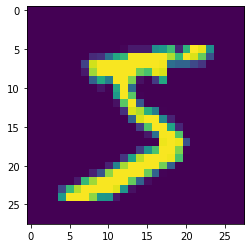

In [5]:
plt.imshow(mnist.train_images()[0])

In [6]:
train_images.shape

(60000, 784)

**Далее будет использоваться функция активации Softmax**

Стандартная функция активации при решении задачи классификации. Softmax нормирует предсказания модели, приводя в диапазон [0, 1], который соответствует значению вероятности принадлежности к классу; т.е. результат работы softmax - вектор вероятностей принадлежности каждому классу.
Логика как для применения сигмоиды в логрегрессии в том же ключе: преобразуем действительные числа в положительные R -> [0, +$\infty$), затем положительные в вероятности [0, +$\infty$) -> [0, 1]. 

$Softmax = \frac{e^{z_i}}{\sum_j^K e^{z_j}}$

Почему первое преобразование - именно экспонента? Исторически и потому что красиво дифференцируется $({e^x})' = {e^x}$, с тем же успехом мы могли бы считать $\frac{42^{z_i}}{\sum_j^K 42^{z_j}}$, изменение основания степени только скалирует данные, не меняя сути.

In [7]:
# The full neural network code!
###############################
import numpy as np
import mnist
from keras.models import Sequential
from keras.layers import Dense
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical


from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, plot_confusion_matrix, ConfusionMatrixDisplay

In [8]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [12]:
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),  #аргумент input_shape задает вид входных данных, необходим для 1-го слоя. альтерантивно можно создать отдельный слой inout перед первым полносвяным
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])


# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)


# Train the model.

model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32,
)

# Evaluate the model.
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3506 - accuracy: 0.8951
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1861 - accuracy: 0.9434
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1438 - accuracy: 0.9564
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1200 - accuracy: 0.9635
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1120 - accuracy: 0.9645


[0.11202523112297058, 0.9645000100135803]

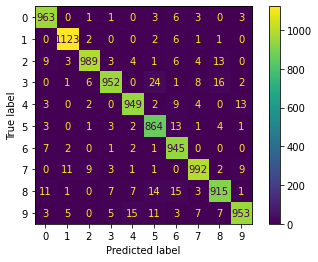

accuracy: 0.9645


In [13]:
# посчитаем меткики

predictions = model.predict(test_images)
predictions_label = np.argmax(predictions, axis=1)

cm = confusion_matrix(test_labels, predictions_label)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


# так как класы в таргете примерно сбалансированы можно применить и accuracy_score
acc = accuracy_score(test_labels, predictions_label)
print(f'accuracy: {acc}')



In [52]:
?model

# Практическое задание

<ol>
    <li>Попробуйте обучить, нейронную сеть на Keras(рассмотренную на уроке) на датасете MNIST с другими параметрами. 
        Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность?</li>
    <li>Поработайте с документацией Keras. Попробуйте найти полезные команды Keras неразобранные на уроке.</li>
</ol>

## Попробуем поперебирать параметры модели с помощью GridSearch

In [16]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV


In [56]:
# для удобства обернем в функцию 

def build_model(optimizer = 'adam', activation = 'relu'):
  
  model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),  #аргумент input_shape задает вид входных данных, необходим для 1-го слоя. альтерантивно можно создать отдельный слой inout перед первым полносвяным
    Dense(64, activation='relu'),
    Dense(10, activation='softmax'),
  ])


  model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
  )


  return model

In [57]:
# воспользуюсь ранней остановкой обучения
# my_callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, min_delta=0.01, restore_best_weights=True)]

In [60]:
param_grid = {
              'epochs' :              [5,10,50],
              'batch_size' :          [32, 64],
              'optimizer' :           ['adam', 'rmsprop'],

             }

In [61]:
model = KerasClassifier(build_fn = build_model, verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [62]:
%%time

gs = GridSearchCV(
    estimator=model,
    param_grid=param_grid, 
    cv=2, 
    n_jobs=-1, 
    scoring='accuracy',
    verbose=2
)
fitted_model = gs.fit(train_images, train_labels)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [63]:
print(fitted_model.best_params_, fitted_model.best_score_)

{'batch_size': 64, 'epochs': 50, 'optimizer': 'rmsprop'} 0.9669833333333333


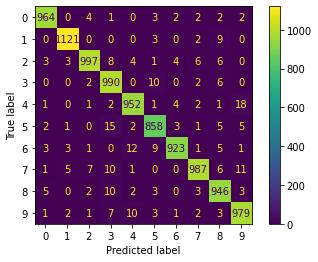

accuracy: 0.9717


In [64]:
predictions = fitted_model.predict_proba(test_images)
predictions_label = np.argmax(predictions, axis=1)

cm = confusion_matrix(test_labels, predictions_label)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


# так как класы в таргете примерно сбалансированы можно применить и accuracy_score
acc = accuracy_score(test_labels, predictions_label)
print(f'accuracy: {acc}')


In [68]:
print(f'Метрика после подбора параметров выросла до: {acc}')
# Удалось улучщить за счет больщего числа эпох, и использования rmsprop

Метрика после подбора параметров выросла до: 0.9717


## Попробуем поперебирать более глубоко, с разным числом нейронов, с использованием Keras Tuner

In [128]:
# !pip install -U keras-tuner

from kerastuner.tuners import RandomSearch, Hyperband, BayesianOptimization
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist
from keras.models import load_model

In [121]:
# по новой загружаем датасет
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train / 255 
x_test = x_test / 255 
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

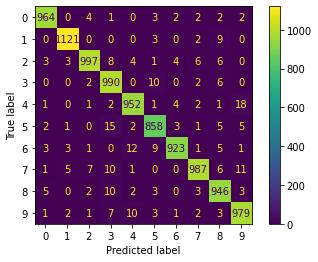

accuracy: 0.9717
Метрика после глубокого тюнинга модели, accuracy выросла до: 0.9717


In [134]:
# все довольно долго крутится, поэтому сохранил уже оттюнингованную модель

model_tune_load = load_model('model_tune_.h5')
predictions = model_tune_load.predict(x_test)
# predictions_label = np.argmax(predictions, axis=1)

cm = confusion_matrix(test_labels, predictions_label)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


# так как класы в таргете примерно сбалансированы можно применить и accuracy_score
acc = accuracy_score(test_labels, predictions_label)
print(f'accuracy: {acc}')


print(f'Метрика после глубокого тюнинга модели, accuracy выросла до: {acc}')
# Удалось улучщить за счет более сложной архитектуры модели

In [72]:
# взял готовый код 
# https://colab.research.google.com/drive/1m_8puwuGg9C7LWChv4YvZEmAlocGC7nG

In [97]:
def build_model_tune(hp):
    model = Sequential()
    activation_choice = hp.Choice('activation', values=['relu', 'sigmoid', 'tanh', 'elu', 'selu'])    
    model.add(Dense(units=hp.Int('units_input',    # Полносвязный слой с разным количеством нейронов
                                   min_value=512,    # минимальное количество нейронов - 128
                                   max_value=1024,   # максимальное количество - 1024
                                   step=32),
                    input_dim=784,
                    activation=activation_choice))
    model.add(Dense(units=hp.Int('units_hidden',        
                                   min_value=128,   
                                   max_value=600,   
                                   step=32),
                    activation=activation_choice))   
    model.add(Dense(10, activation='softmax'))
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam','rmsprop','SGD']),
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    return model

In [98]:
# cоздаем tuner
tuner = RandomSearch(
    build_model_tune,            # функция создания модели
    objective='val_accuracy',    # метрика, которую нужно оптимизировать - 
                                 # доля правильных ответов на проверочном наборе данных
    max_trials=80,               # максимальное количество запусков обучения 
    directory='test_directory'   # каталог, куда сохраняются обученные сети  
    )

INFO:tensorflow:Reloading Oracle from existing project test_directory/untitled_project/oracle.json


In [99]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'tanh', 'elu', 'selu'], 'ordered': False}
units_input (Int)
{'default': None, 'conditions': [], 'min_value': 512, 'max_value': 1024, 'step': 32, 'sampling': None}
units_hidden (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 600, 'step': 32, 'sampling': None}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'rmsprop', 'SGD'], 'ordered': False}


In [100]:
%%time
tuner.search(x_train,                  # Данные для обучения
             y_train,                  # Правильные ответы
             batch_size=256,           # Размер мини-выборки
             epochs=20,                # Количество эпох обучения 
             validation_split=0.2,     # Часть данных, которая будет использоваться для проверки
             )

Trial 80 Complete [00h 02m 22s]
val_accuracy: 0.9797499775886536

Best val_accuracy So Far: 0.9829999804496765
Total elapsed time: 03h 03m 36s
INFO:tensorflow:Oracle triggered exit
CPU times: user 4h 23min 12s, sys: 7min 36s, total: 4h 30min 48s
Wall time: 3h 3min 36s


In [101]:
tuner.results_summary()

Results summary
Results in test_directory/untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
activation: relu
units_input: 768
units_hidden: 448
optimizer: rmsprop
Score: 0.9829999804496765
Trial summary
Hyperparameters:
activation: relu
units_input: 864
units_hidden: 160
optimizer: rmsprop
Score: 0.9823333621025085
Trial summary
Hyperparameters:
activation: elu
units_input: 768
units_hidden: 256
optimizer: adam
Score: 0.981416642665863
Trial summary
Hyperparameters:
activation: relu
units_input: 896
units_hidden: 480
optimizer: adam
Score: 0.9808333516120911
Trial summary
Hyperparameters:
activation: elu
units_input: 800
units_hidden: 160
optimizer: rmsprop
Score: 0.9805833101272583
Trial summary
Hyperparameters:
activation: relu
units_input: 704
units_hidden: 544
optimizer: adam
Score: 0.9804166555404663
Trial summary
Hyperparameters:
activation: tanh
units_input: 832
units_hidden: 480
optimizer: adam
Score: 0.9802500009536743
Trial summary
Hyperparameters:
activa

In [102]:
# лучшая модель

model_tune = tuner.get_best_models(num_models=1)

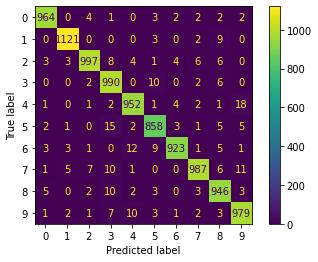

accuracy: 0.9717
Метрика после глубокого тюнинга модели, accuracy выросла до: 0.9717


In [111]:
predictions = model_tune[0].predict(x_test)
# predictions_label = np.argmax(predictions, axis=1)

cm = confusion_matrix(test_labels, predictions_label)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


# так как класы в таргете примерно сбалансированы можно применить и accuracy_score
acc = accuracy_score(test_labels, predictions_label)
print(f'accuracy: {acc}')


print(f'Метрика после глубокого тюнинга модели, accuracy выросла до: {acc}')
# Удалось улучщить за счет более сложной архитектуры модели

In [130]:
model_tune[0].summary()

# Save the model to disk.
model_tune[0].save('model_tune_.h5')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 768)               602880    
                                                                 
 dense_1 (Dense)             (None, 448)               344512    
                                                                 
 dense_2 (Dense)             (None, 10)                4490      
                                                                 
Total params: 951,882
Trainable params: 951,882
Non-trainable params: 0
_________________________________________________________________
